# **Deep Learning - CSE4006**
# LAB 4

> ## Name: **K CHARVI**
> ## Reg No: 19BCE7002
> ## Date: 25|10|2021
> ## Submitted To: Dr. BKSP Kumarraju Alluri


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2

labels=['anger','happy','neutral','sad','surprise']  

In [21]:
import os

# Going through all 10 classes 
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set"): #train set
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/Deep Learning Lab/facial_expressions/dataset"): # test set
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 5 directories and 0 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set
there are 0 directories and 250 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set/anger
there are 0 directories and 250 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set/happy
there are 0 directories and 250 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set/neutral
there are 0 directories and 250 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set/sad
there are 0 directories and 250 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set/surprise
there are 5 directories and 0 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/dataset
there are 0 directories and 106 images in /content/drive/MyDrive/Deep Learning Lab/facial_expressions/dataset/anger
there are 0 directories and 123 images in /content/drive/MyDrive/Deep Learning 

In [22]:
# setup directories
tr_dir="/content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set"
te_dir="/content/drive/MyDrive/Deep Learning Lab/facial_expressions/dataset"

In [23]:
# classnames
import pathlib
import numpy as np

data_dir=pathlib.Path(te_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['anger' 'happy' 'neutral' 'sad' 'surprise']


## import packages

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen=ImageDataGenerator(rescale=1/255.0,)
test_datagen=ImageDataGenerator(rescale=1/255.0)

In [26]:
model = keras.Sequential()

In [27]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [28]:
training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning Lab/facial_expressions/data_set', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning Lab/facial_expressions/dataset', batch_size=64, target_size=(100,100))


Found 1250 images belonging to 5 classes.
Found 572 images belonging to 5 classes.


In [29]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=15)

Epoch 1/15
20/20 [==============================] - 845s 43s/step - loss: 1.6468 - accuracy: 0.2768 - val_loss: 1.5678 - val_accuracy: 0.2483
Epoch 2/15
20/20 [==============================] - 27s 1s/step - loss: 1.4178 - accuracy: 0.4024 - val_loss: 1.5081 - val_accuracy: 0.3776
Epoch 3/15
20/20 [==============================] - 27s 1s/step - loss: 1.2280 - accuracy: 0.5152 - val_loss: 1.5584 - val_accuracy: 0.3829
Epoch 4/15
20/20 [==============================] - 27s 1s/step - loss: 1.0493 - accuracy: 0.5800 - val_loss: 1.7196 - val_accuracy: 0.3671
Epoch 5/15
20/20 [==============================] - 28s 1s/step - loss: 0.8975 - accuracy: 0.6544 - val_loss: 1.5313 - val_accuracy: 0.4423
Epoch 6/15
20/20 [==============================] - 28s 1s/step - loss: 0.7818 - accuracy: 0.7000 - val_loss: 1.5530 - val_accuracy: 0.4318
Epoch 7/15
20/20 [==============================] - 28s 1s/step - loss: 0.6720 - accuracy: 0.7672 - val_loss: 1.3623 - val_accuracy: 0.4878
Epoch 8/15
20/20 [

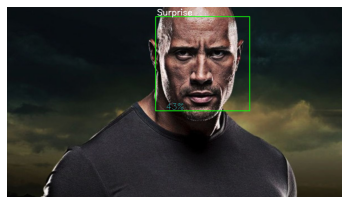

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("/content/drive/MyDrive/Deep Learning Lab/facial_expressions/dwayne_johnson.jpg")
plt.imshow(steak)
plt.axis(False);

In [32]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=100):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [34]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/drive/MyDrive/Deep Learning Lab/facial_expressions/dwayne_johnson.jpg")


In [35]:
pred = model.predict(tf.expand_dims(steak, axis=0))
np.argmax(pred)

3

In [36]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = labels[np.argmax(pred)]
pred_class

'sad'